# Marvel Character Stats

## 1. Core Mission  

#### 1-1 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다.  이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
marvel_df = pd.read_csv('/jupyter/Data/Marvel/characters_stats.csv')
print(marvel_df.shape)
marvel_df.head()

(611, 9)


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [3]:
marvel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


In [4]:
# 능력치의 총합 Total값에 이상이 있는 데이터가 있는지를 확인

marvel_df[marvel_df['Intelligence']+marvel_df['Strength']+marvel_df['Speed']+marvel_df['Durability']+marvel_df['Power']+marvel_df['Combat'] != marvel_df['Total']]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total


In [166]:
marvel_df[marvel_df['Total'] == marvel_df['Total'].max()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


### 능력치 수치의 합이 가장 높은 캐릭터는 Martian Manhunter이다.

#### 1-2 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [6]:
marvel_df['Alignment'].unique()

array(['good', 'bad', nan, 'neutral'], dtype=object)

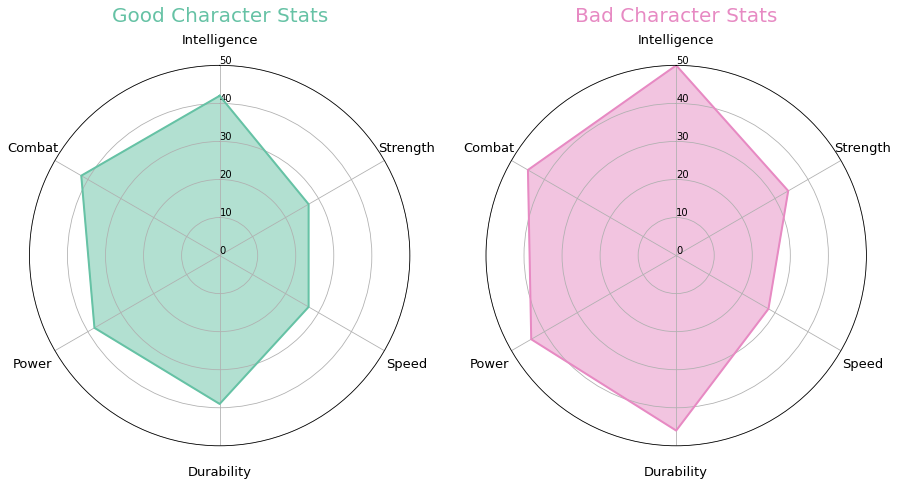

In [150]:
stats = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
length = len(stats)

angles = [x/float(length)*(2*np.pi) for x in range(length)] # 등분점을 설정
angles += angles[:1] ## 시작점 추가

palette = plt.cm.get_cmap("Set2", 9) # palette를 설정

fig = plt.figure(figsize=(15,20))

chara = []

good_chara = marvel_df[marvel_df['Alignment'] == 'good'][stats].mean().round(0).tolist()
good_chara += good_chara[:1]
chara.append(good_chara)

bad_chara = marvel_df[marvel_df['Alignment'] == 'bad'][stats].mean().round(0).tolist()
bad_chara += bad_chara[:1]
chara.append(bad_chara)

for i in range(2):
    ax = plt.subplot(1, 2, i+1, polar=True)
    ax.set_theta_offset(np.pi/2) # 시작점 설정
    ax.set_theta_direction(-1) # 그래프가 그려지는 방향 설정

    plt.xticks(angles[:-1], stats, fontsize=13) # x축 눈금 label 설정 (캐릭터 능력치)
    ax.tick_params(axis='x', which='major', pad=15) # x축과 눈금 사이에 여백 생성

    ax.set_rlabel_position(0) # y축 각도 설정
    plt.yticks([0, 10, 20, 30, 40, 50], fontsize=10)
    plt.ylim(0, 50)
    
    color_num = 0 if i == 0 else 3
    ax.plot(angles, chara[i], color=palette(color_num),linewidth=2) # Rader chart 출력
    ax.fill(angles, chara[i], color=palette(color_num),alpha=0.5) # Rader chart 도형 내부의 색을 채우기
    title = 'Good Character Stats' if i == 0 else 'Bad Character Stats'
    ax.set_title(title, color=palette(color_num), size=20, y=1.1)

plt.show()

## 2. Extra Mission

**2-1** 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.

In [137]:
marvel_df.head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
6,Adam Monroe,good,63,10,12,100,71,64,320
7,Adam Strange,good,1,1,1,1,0,1,5
8,Agent 13,good,1,1,1,1,0,1,5
9,Agent Bob,good,10,8,13,5,5,20,61


In [136]:
# Publisher의 정보를 가지고 있는 새로운 데이터셋을 불러온다.

publisher_df = pd.read_csv('/jupyter/Data/Marvel/marvel_characters_info.csv')
publisher_df.head(10)

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
5,5,Absorbing Man,bad,Male,blue,Human,No Hair,Marvel Comics,-,193.0,122.0
6,6,Adam Monroe,good,Male,blue,-,Blond,NBC - Heroes,-,-99.0,-99.0
7,7,Adam Strange,good,Male,blue,Human,Blond,DC Comics,-,185.0,88.0
8,8,Agent 13,good,Female,blue,-,Blond,Marvel Comics,-,173.0,61.0
9,9,Agent Bob,good,Male,brown,Human,Brown,Marvel Comics,-,178.0,81.0


In [167]:
# Publisher 속성의 개별값을 확인
publisher_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [144]:
# InnerJoin을 활용하여 두 DataFrame을 merge

new_marvel_df = pd.merge(left=marvel_df[['Name', 'Alignment', 'Total']], right=publisher_df[['Name', 'Publisher']], how='inner', on='Name')
new_marvel_df.head()

,Name,Alignment,Total,Publisher
0,A-Bomb,good,316,Marvel Comics
1,Abe Sapien,good,299,Dark Horse Comics
2,Abin Sur,good,406,DC Comics
3,Abomination,bad,436,Marvel Comics
4,Abraxas,bad,526,Marvel Comics


In [165]:
new_marvel_df.groupby('Publisher')['Total'].mean().round(1)

Publisher
ABC Studios          166.0
DC Comics            253.4
Dark Horse Comics    196.9
Hanna-Barbera          5.0
HarperCollins          5.0
Icon Comics          148.0
Image Comics          70.6
Marvel Comics        243.9
Microsoft            425.0
NBC - Heroes         140.5
Shueisha             481.5
Sony Pictures        398.0
SyFy                 188.8
Team Epic TV           5.0
Universal Studios    237.0
Wildstorm              5.0
Name: Total, dtype: float64

### 캐릭터 능력치의 합의 평균은 481.5로 Shueisha이 가장 크다. 

 **2-2** 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.

In [178]:
marvel_df['Alignment'].value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

In [181]:
marvel_df[marvel_df['Alignment'].isnull()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
28,Anti-Venom,NaN,75,60,65,90,85,84,459
98,Blackwulf,NaN,50,28,8,30,59,25,200
560,Trickster,NaN,1,1,1,1,0,1,5


위 세명의 캐릭터는 characters_stats.csv, marvel_characters_info.csv 두개의 데이터 셋을 모두 확인해도 Alignment 값이 NaN

In [191]:
good_chara = marvel_df[marvel_df['Alignment'] == 'good']['Total'].mean()
bad_chara = marvel_df[marvel_df['Alignment'] == 'bad']['Total'].mean()
print('좋은 캐릭터들의 능력치 합의 평균: {0:.1f}'.format(good_chara))
print('나쁜 캐릭터들의 능력치 합의 평균: {0:.1f}'.format(bad_chara))

좋은 캐릭터들의 능력치 합의 평균: 215.0
나쁜 캐릭터들의 능력치 합의 평균: 247.2


좋은 캐릭터들이 열세이므로 중립 캐릭터가 좋은 캐릭터 진영에 합류 

In [195]:
good_chara = marvel_df[(marvel_df['Alignment'] == 'good') | (marvel_df['Alignment'] == 'neutral')]['Total'].mean()
print('중립 캐릭터들이 합류한 좋은 캐릭터들의 능력치 합의 평균: {0:.1f}'.format(good_chara))
print('나쁜 캐릭터들의 능력치 합의 평균: {0:.1f}'.format(bad_chara))

중립 캐릭터들이 합류한 좋은 캐릭터들의 능력치 합의 평균: 218.5
나쁜 캐릭터들의 능력치 합의 평균: 247.2


### 나쁜 캐릭터 진영이 승리한다.

**2-3** 종족별 각 능력치의 평균 구하기

In [224]:
col = ['Name', 'Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat', 'Total']
new_marvel_df = pd.merge(left=marvel_df[col], right=publisher_df[['Name', 'Race']], how='inner', on='Name')
new_marvel_df.head()

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Race
0,A-Bomb,38,100,17,80,17,64,316,Human
1,Abe Sapien,88,14,35,42,35,85,299,Icthyo Sapien
2,Abin Sur,50,90,53,64,84,65,406,Ungaran
3,Abomination,63,80,53,90,55,95,436,Human / Radiation
4,Abraxas,88,100,83,99,100,56,526,Cosmic Entity


In [225]:
new_marvel_df['Race'].unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Android', 'Vampire', 'God / Eternal',
       'Symbiote', 'Mutant', 'Atlantean', 'Neyaphem', 'New God', 'Alpha',
       'Bizarro', 'Inhuman', 'Demon', 'Alien', 'Human-Kree', 'Cyborg',
       'Amazon', 'Human / Cosmic', 'Kryptonian', 'Kakarantharaian',
       'Saiyan', 'Flora Colossus', 'Human-Vuldarian', 'Demi-God',
       'Eternal', 'Metahuman', 'Bolovaxian', 'Czarnian', 'Asgardian',
       'Martian', 'Human / Altered', 'Planet', 'Animal', 'Clone',
       'Korugaran', 'Zombie', 'Tamaranean', 'Frost Giant',
       'Mutant / Clone'], dtype=object)

In [226]:
# 종족값이 - 인 데이터를 제거

new_marvel_df = new_marvel_df[new_marvel_df['Race'] != '-']
new_marvel_df

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Race
0,A-Bomb,38,100,17,80,17,64,316,Human
1,Abe Sapien,88,14,35,42,35,85,299,Icthyo Sapien
2,Abin Sur,50,90,53,64,84,65,406,Ungaran
3,Abomination,63,80,53,90,55,95,436,Human / Radiation
4,Abraxas,88,100,83,99,100,56,526,Cosmic Entity
...,...,...,...,...,...,...,...,...,...
592,X-23,75,24,35,90,27,85,336,Mutant / Clone
595,Yellowjacket,88,10,12,28,12,14,164,Human
596,Yellowjacket II,50,10,35,28,31,28,182,Human
597,Ymir,50,100,27,100,83,28,388,Frost Giant


In [273]:
stats = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
length = len(stats)

# 종족별 Stat을 출력
race_stats = new_marvel_df.groupby('Race')[stats].mean().astype(int)
race_stats

,Intelligence,Strength,Speed,Durability,Power,Combat
Race,,,,,,
Alien,67,64,49,77,82,62
Alpha,60,12,16,23,46,30
Amazon,44,50,25,50,21,50
Android,85,62,58,90,83,68
Animal,50,5,23,28,28,64
Asgardian,70,74,58,80,76,70
Atlantean,44,39,31,48,50,47
Bizarro,75,95,100,100,95,85
Bolovaxian,81,90,53,42,100,80


In [276]:
races = [] # 종족별 능력치
race_names = race_stats.index #종족 이름

race_num = race_stats.shape[0]
for i in range(race_num):
    stat_data = race_stats.iloc[i].tolist()
    stat_data += stat_data[:1]
    races.append(stat_data)

In [377]:
angles = [x/float(length)*(2*np.pi) for x in range(length)] # 등분점을 설정
angles += angles[:1] ## 시작점 추가

palette = plt.cm.get_cmap("gist_rainbow_r", 43) # palette를 설정

In [383]:
# 그래프 출력 함수
def draw_graph(n):
    fig = plt.figure(figsize=(25, 25))
    graph_num = 12 if n!=36 else 7
    for i in range(graph_num):
        ax = plt.subplot(4, 3, i+1, polar=True)
        ax.set_theta_offset(np.pi/2) # 시작점 설정
        ax.set_theta_direction(-1) # 그래프가 그려지는 방향 설정
        plt.subplots_adjust(left=0.1, bottom=0.1,  right=0.7, top=1, wspace=0.2, hspace=0.7)
    
        plt.xticks(angles[:-1], stats, fontsize=15) # x축 눈금 label 설정 (캐릭터 능력치)
        ax.tick_params(axis='x', which='major', pad=15) # x축과 눈금 사이에 여백 생성

        ax.set_rlabel_position(0) # y축 각도 설정
        plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)
        plt.ylim(0, 100)
    
        
        ax.plot(angles, races[i+n], color=palette(i+n), linewidth=2) # Rader chart 출력
        ax.fill(angles, races[i+n], color=palette(i+n), alpha=0.5) # Rader chart 도형 내부의 색을 채우기
        ax.set_title(race_names[i+n], color=palette(i+n), size=30, y=1.2)
    
    plt.show()

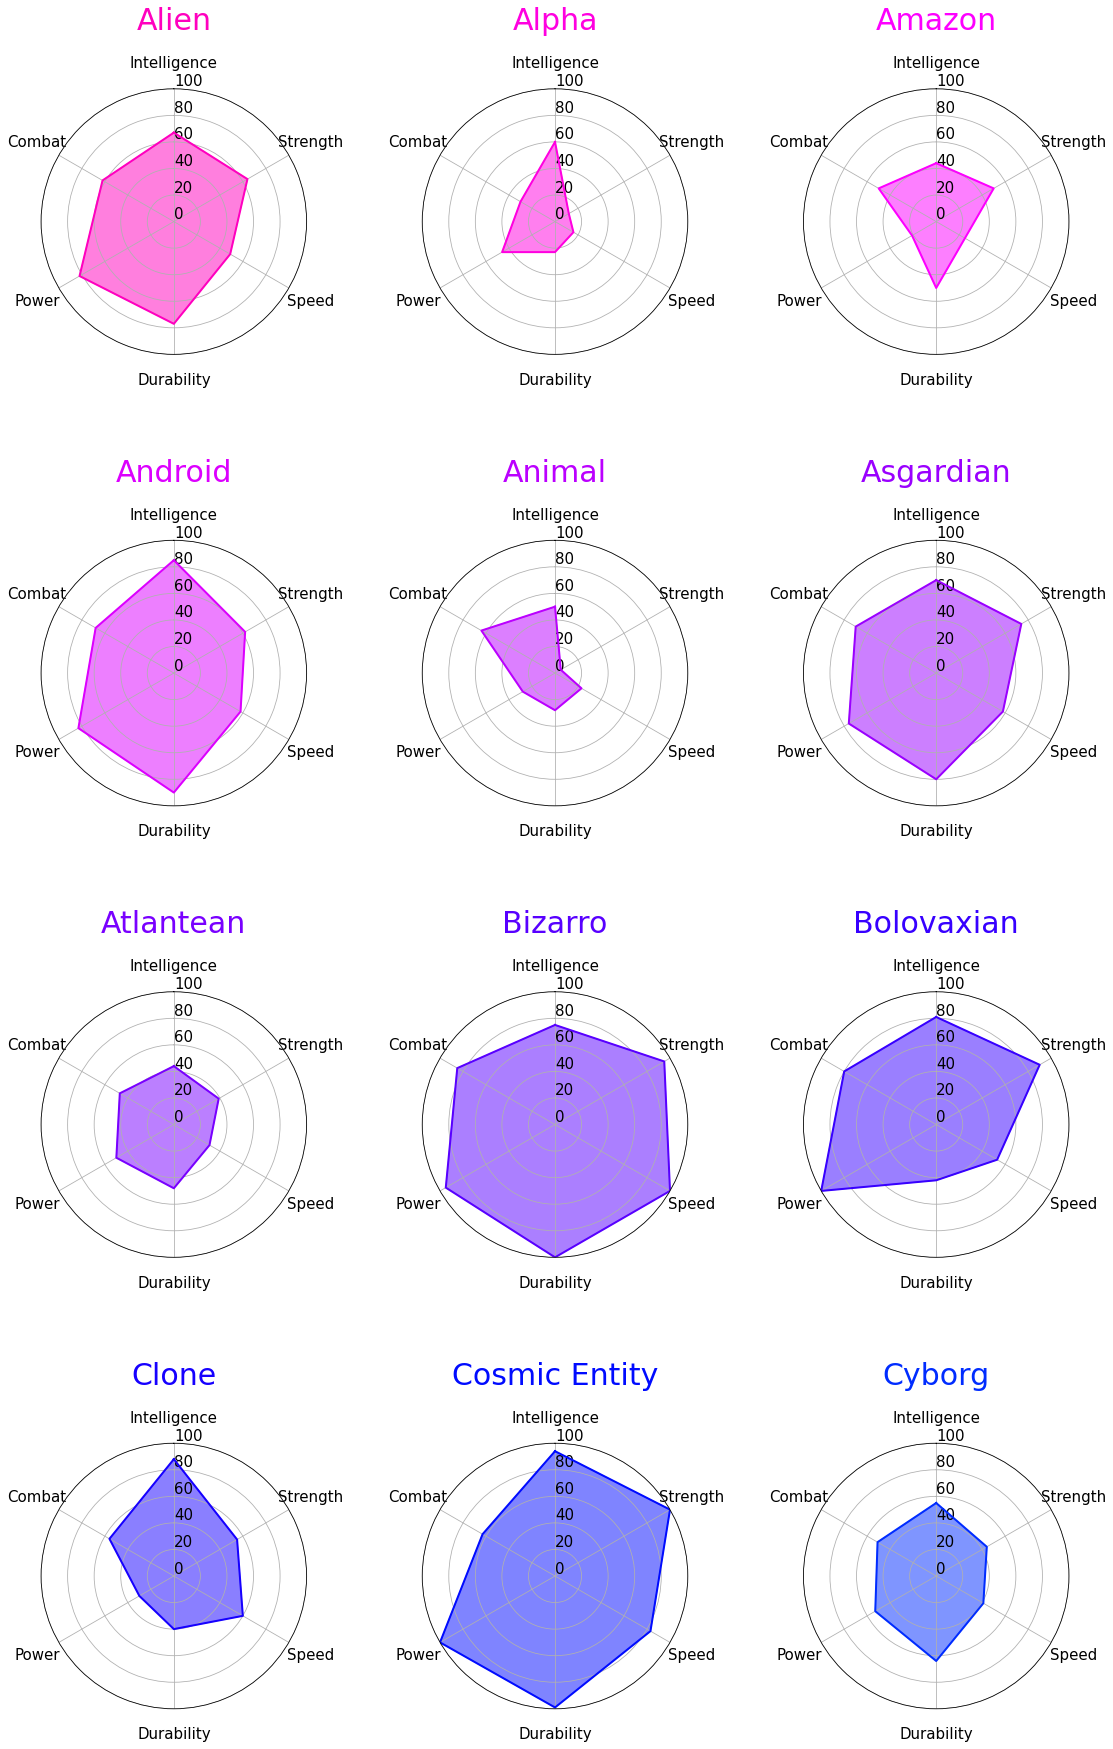

In [385]:
draw_graph(0)

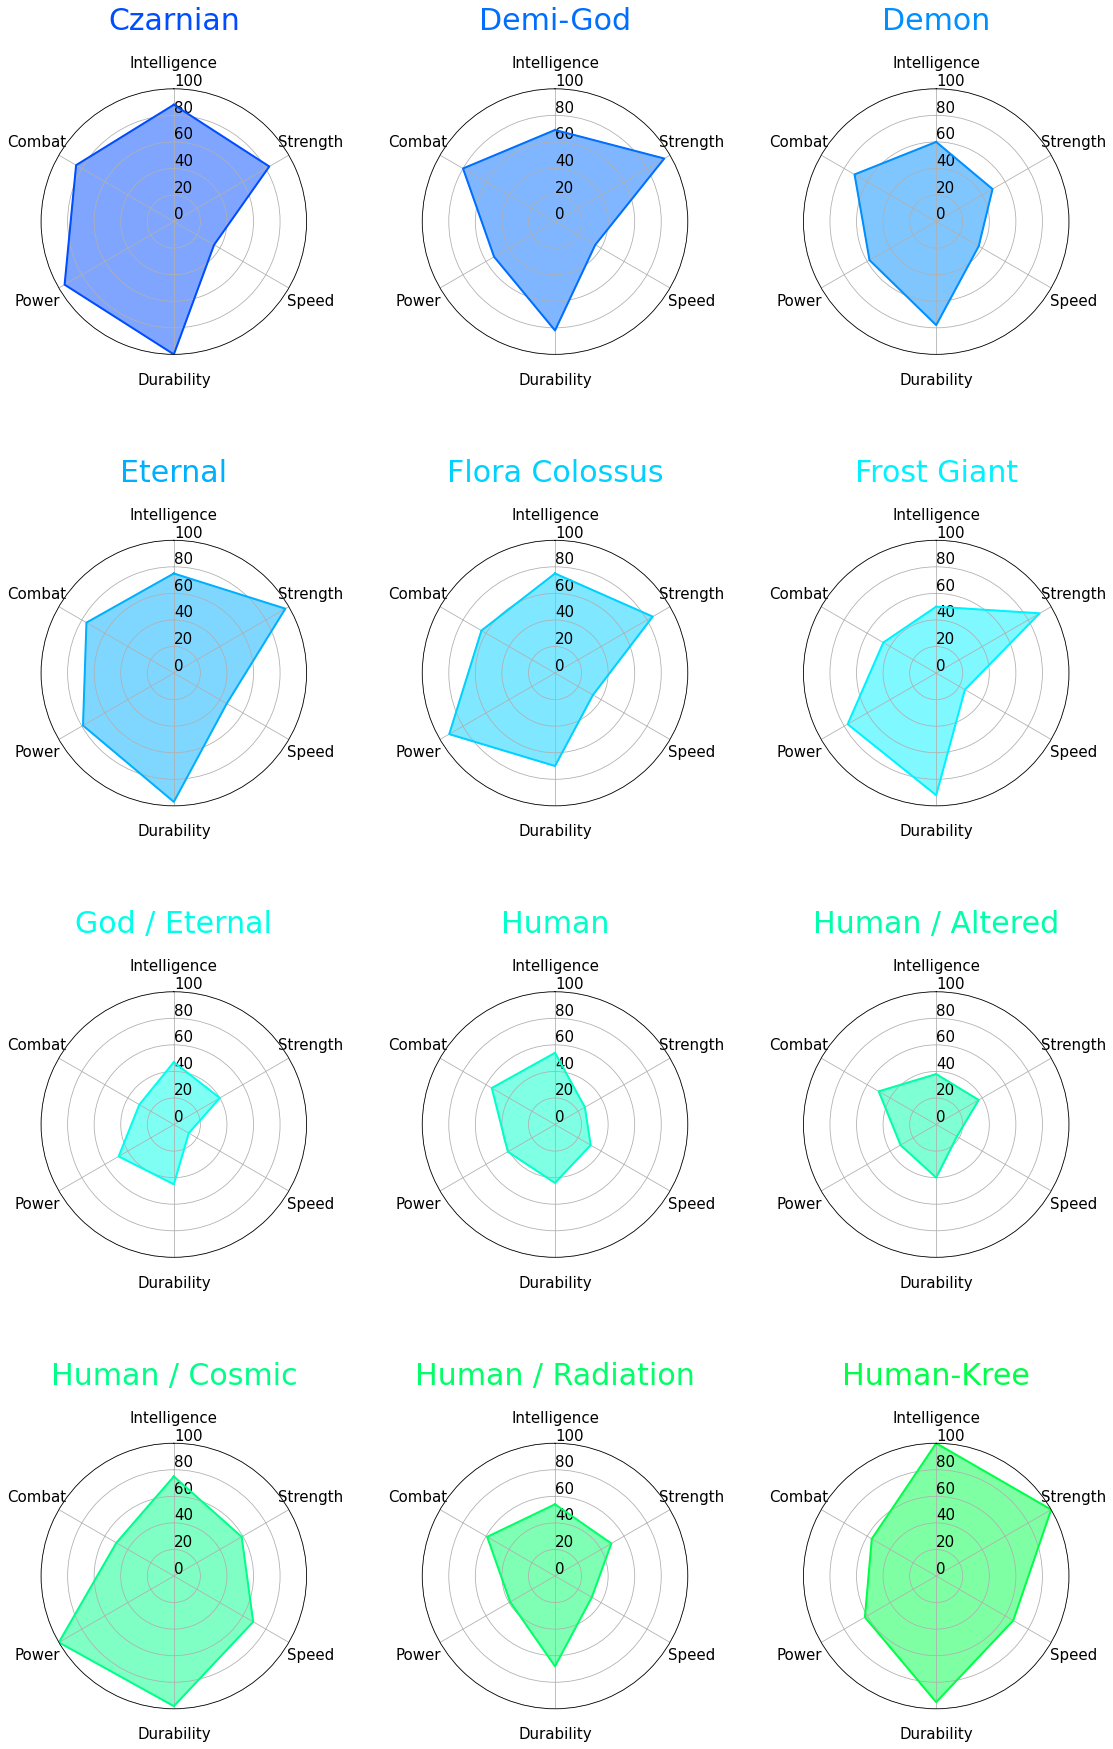

In [380]:
draw_graph(12)

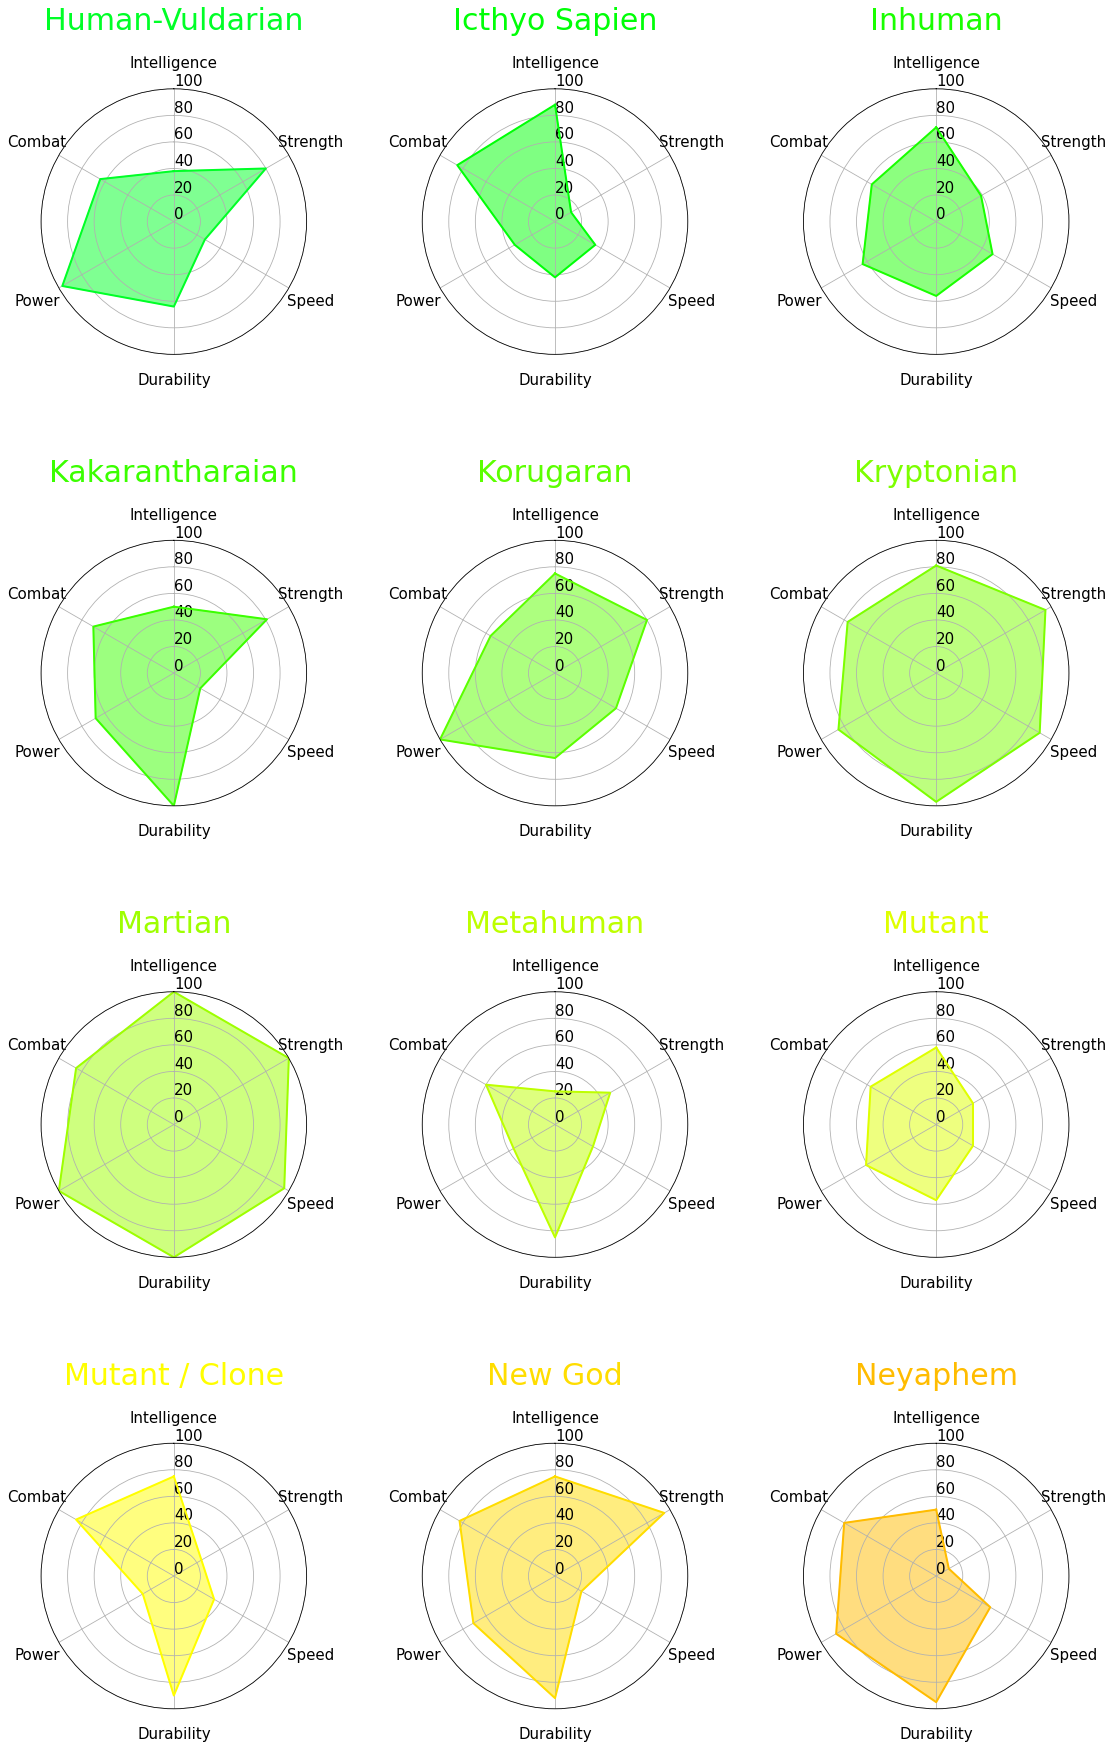

In [381]:
draw_graph(24)

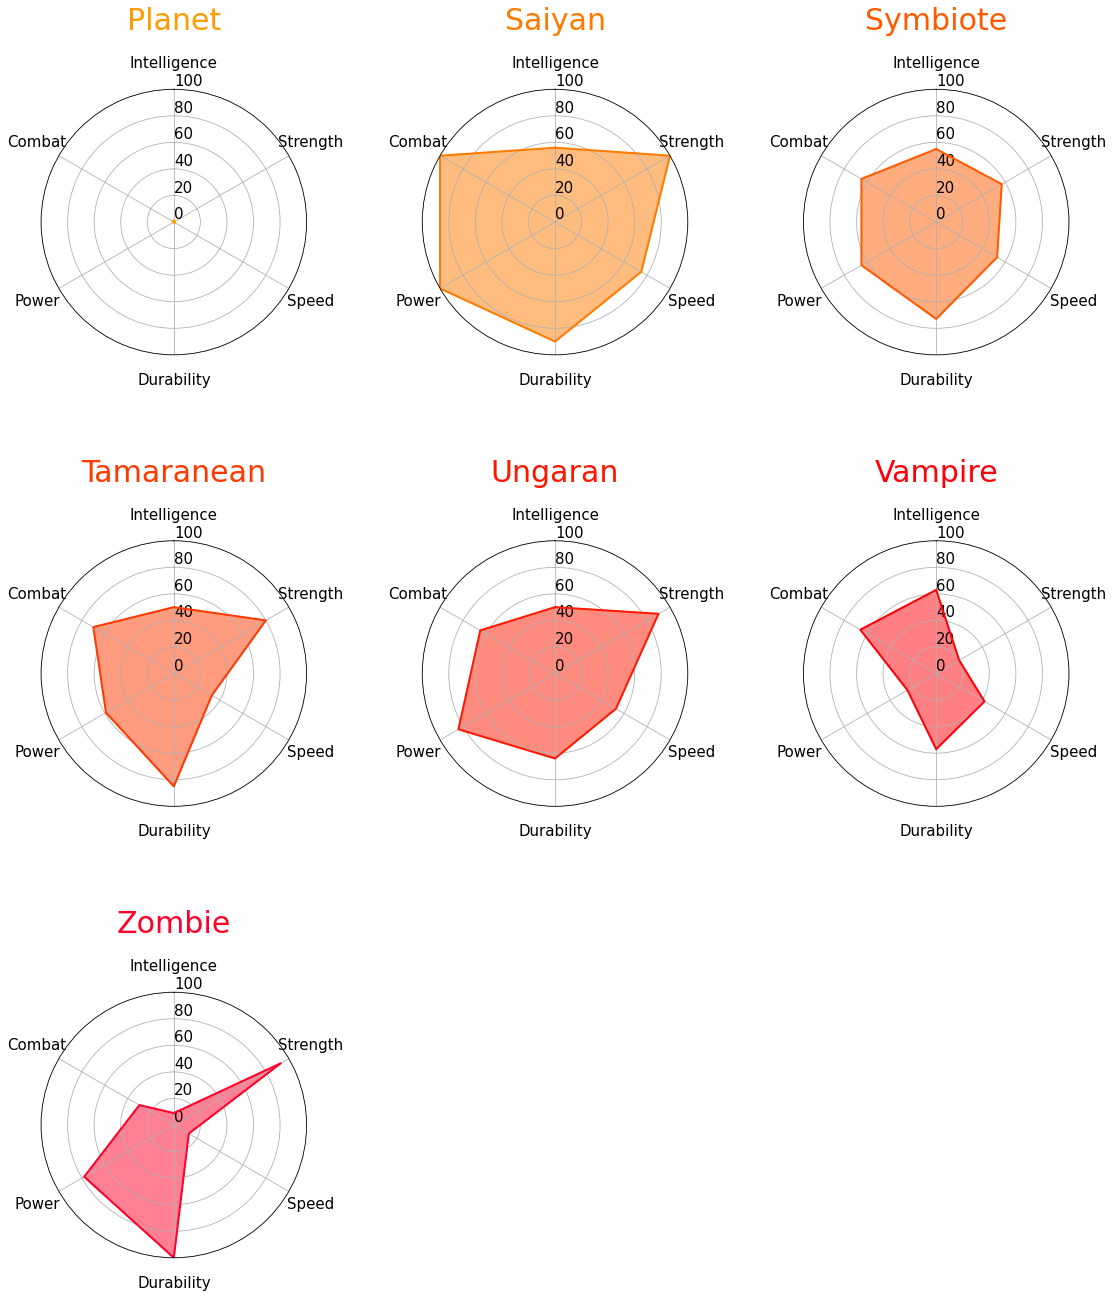

In [384]:
draw_graph(36)